In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value

np.random.seed(seed_value)

In [4]:
# df = pd.read_csv("data.csv", index_col=0)
df = pd.read_parquet("data.parquet")
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,None,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,None,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,None,Industrial Area,3.1,7.0,NaN,NaN,None,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,None,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,None,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,None,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,None,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,None,Industrial Area,4.7,7.5,NaN,NaN,None,NaN,1990-03-01


In [5]:
from datetime import datetime

# Converting the date field which was of string type into a datetime format field

In [6]:
df["date"] = pd.to_datetime(df["date"])

In [7]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,None,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,None,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,None,Industrial Area,3.1,7.0,NaN,NaN,None,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,None,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,None,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,None,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,None,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,None,Industrial Area,4.7,7.5,NaN,NaN,None,NaN,1990-03-01


In [8]:
df.dtypes

stn_code                               object
sampling_date                          object
state                                  object
location                               object
agency                                 object
type                                   object
so2                                   float64
no2                                   float64
rspm                                  float64
spm                                   float64
location_monitoring_station            object
pm2_5                                 float64
date                           datetime64[ns]
dtype: object

# Dropping the field sampling date as it contains the same values of the date field.

In [9]:
df.drop(['sampling_date'],  axis=1, inplace=True)
df.head()

,stn_code,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,Andhra Pradesh,Hyderabad,None,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,None,NaN,1990-02-01
1,151.0,Andhra Pradesh,Hyderabad,None,Industrial Area,3.1,7.0,NaN,NaN,None,NaN,1990-02-01
2,152.0,Andhra Pradesh,Hyderabad,None,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,None,NaN,1990-02-01
3,150.0,Andhra Pradesh,Hyderabad,None,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,None,NaN,1990-03-01
4,151.0,Andhra Pradesh,Hyderabad,None,Industrial Area,4.7,7.5,NaN,NaN,None,NaN,1990-03-01


In [10]:
for column in df.columns:
    percent = df[column].isna().sum()/df.shape[0] * 100
    print(column, percent)
    

stn_code 0.0
state 0.0
location 0.0
agency 39.78963040571279
type 1.3588092842011423
so2 10.055280607673115
no2 4.864509666064691
rspm 11.246823547792681
spm 48.82247250904111
location_monitoring_station 7.720904157303887
pm2_5 97.66654259547738
date 0.0009190458466020578


In [11]:
df["pm2_5"].isna().sum()/df.shape[0] * 100

97.66654259547738

# Dropping the field pm2_5 becuase 97% of the the variable are of null values

In [12]:
df.drop(['pm2_5'],  axis=1, inplace=True)
df.head()

,stn_code,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,date
0,150.0,Andhra Pradesh,Hyderabad,None,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,None,1990-02-01
1,151.0,Andhra Pradesh,Hyderabad,None,Industrial Area,3.1,7.0,NaN,NaN,None,1990-02-01
2,152.0,Andhra Pradesh,Hyderabad,None,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,None,1990-02-01
3,150.0,Andhra Pradesh,Hyderabad,None,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,None,1990-03-01
4,151.0,Andhra Pradesh,Hyderabad,None,Industrial Area,4.7,7.5,NaN,NaN,None,1990-03-01


In [13]:
#dfx = df[['so2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
#f,ax=plt.subplots(figsize=(15,5))
#sns.pointplot(x='year', y='so2', dfx=df)

# For our requirement we need to be focusing only on the Andhra pradesh state and drop the remaining rows that does not belong to that state

In [14]:
df = df[df["state"]=="Andhra Pradesh"]
# df.drop(['state']!="Andhra Pradesh",  axis=1, inplace=True)
df.head()



,stn_code,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,date
0,150.0,Andhra Pradesh,Hyderabad,None,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,None,1990-02-01
1,151.0,Andhra Pradesh,Hyderabad,None,Industrial Area,3.1,7.0,NaN,NaN,None,1990-02-01
2,152.0,Andhra Pradesh,Hyderabad,None,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,None,1990-02-01
3,150.0,Andhra Pradesh,Hyderabad,None,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,None,1990-03-01
4,151.0,Andhra Pradesh,Hyderabad,None,Industrial Area,4.7,7.5,NaN,NaN,None,1990-03-01


In [15]:
for column in df.columns:
    percent = df[column].isna().sum()/df.shape[0] * 100
    print(column, percent)
    

stn_code 0.0
state 0.0
location 0.0
agency 36.02093446601942
type 2.3134101941747574
so2 2.6054308252427183
no2 2.0896541262135924
rspm 4.323422330097087
spm 55.2905036407767
location_monitoring_station 3.9290048543689324
date 0.0


In [16]:
df1 = df[0:0] # empty

# get median for each location, fill na
for location_name in df["location"].unique():
    location_df:pd.DataFrame = df[df["location"] == location_name]
    location_df["spm"] = location_df["spm"].fillna(location_df["spm"].median())
    df1 = pd.concat([df1, location_df]) # add location df to df1
# for any thin thats left replace with full median
df1["spm"] = df1["spm"].fillna(df1["spm"].median())

df = df1.copy()


for column in df.columns:
    percent = df[column].isna().sum()/df.shape[0] * 100
    print(column, percent)

stn_code 0.0
state 0.0
location 0.0
agency 36.02093446601942
type 2.3134101941747574
so2 2.6054308252427183
no2 2.0896541262135924
rspm 4.323422330097087
spm 0.0
location_monitoring_station 3.9290048543689324
date 0.0


# No more null values present in the spm column and we are moving into the rspm column now to handle the null values

In [17]:
df1 = df[0:0] # empty

# get median for each location, fill na
for location_name in df["location"].unique():
    location_df:pd.DataFrame = df[df["location"] == location_name]
    location_df["rspm"] = location_df["rspm"].fillna(location_df["rspm"].median())
    df1 = pd.concat([df1, location_df]) # add location df to df1
# for any thin thats left replace with full median
df1["rspm"] = df1["rspm"].fillna(df1["rspm"].median())

df = df1.copy()


for column in df.columns:
    percent = df[column].isna().sum()/df.shape[0] * 100
    print(column, percent)

stn_code 0.0
state 0.0
location 0.0
agency 36.02093446601942
type 2.3134101941747574
so2 2.6054308252427183
no2 2.0896541262135924
rspm 0.0
spm 0.0
location_monitoring_station 3.9290048543689324
date 0.0


# No more null values present in the rspm column and we are moving into the no2 column now to handle the null values

In [18]:
df1 = df[0:0] # empty

# get median for each location, fill na
for location_name in df["location"].unique():
    location_df:pd.DataFrame = df[df["location"] == location_name]
    location_df["no2"] = location_df["no2"].fillna(location_df["no2"].median())
    df1 = pd.concat([df1, location_df]) # add location df to df1
# for any thin thats left replace with full median
df1["no2"] = df1["no2"].fillna(df1["no2"].median())

df = df1.copy()


for column in df.columns:
    percent = df[column].isna().sum()/df.shape[0] * 100
    print(column, percent)

stn_code 0.0
state 0.0
location 0.0
agency 36.02093446601942
type 2.3134101941747574
so2 2.6054308252427183
no2 0.0
rspm 0.0
spm 0.0
location_monitoring_station 3.9290048543689324
date 0.0


# No more null values present in the no2 column and we are moving into the so2 column now to handle the null values

In [19]:
df1 = df[0:0] # empty

# get median for each location, fill na
for location_name in df["location"].unique():
    location_df:pd.DataFrame = df[df["location"] == location_name]
    location_df["so2"] = location_df["so2"].fillna(location_df["so2"].median())
    df1 = pd.concat([df1, location_df]) # add location df to df1
# for any thin thats left replace with full median
df1["so2"] = df1["so2"].fillna(df1["so2"].median())

df = df1.copy()


for column in df.columns:
    percent = df[column].isna().sum()/df.shape[0] * 100
    print(column, percent)

stn_code 0.0
state 0.0
location 0.0
agency 36.02093446601942
type 2.3134101941747574
so2 0.0
no2 0.0
rspm 0.0
spm 0.0
location_monitoring_station 3.9290048543689324
date 0.0


# All the numerical variables does not consist of any null values and are fine to be proceeded

# But we can see that the variable agency consists of 36% of null values(huge) and does not have any numerical values
# Hence it is better to drop the entire column 

In [20]:
#Dropping the column agency

df.drop(['agency'],  axis=1, inplace=True)
df.head()


,stn_code,state,location,type,so2,no2,rspm,spm,location_monitoring_station,date
0,150.0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,81.0,209.0,None,1990-02-01
1,151.0,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,81.0,209.0,None,1990-02-01
2,152.0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,81.0,209.0,None,1990-02-01
3,150.0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,81.0,209.0,None,1990-03-01
4,151.0,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,81.0,209.0,None,1990-03-01


# We have still got null values in the variables type and location_monitoring_station and the null values are dropped

In [21]:
df.dropna(subset=['type'], how='all', inplace=True)
df.dropna(subset=['location_monitoring_station'], how= 'all', inplace=True)

In [22]:
for column in df.columns:
    percent = df[column].isna().sum()/df.shape[0] * 100
    print(column, percent)

stn_code 0.0
state 0.0
location 0.0
type 0.0
so2 0.0
no2 0.0
rspm 0.0
spm 0.0
location_monitoring_station 0.0
date 0.0


# No null values are present and we are fine to proceed
 

In [23]:
df.dtypes

stn_code                               object
state                                  object
location                               object
type                                   object
so2                                   float64
no2                                   float64
rspm                                  float64
spm                                   float64
location_monitoring_station            object
date                           datetime64[ns]
dtype: object

In [24]:
#print(df['Courses'].unique())

# print(df["stn_code"].unique)
for val in df["stn_code"].unique():
    print(val)



95.0
203.0
365.0
393.0
394.0
nan
150.0
151.0
152.0
470.0
745.0
233.0
234.0
371.0
387.0
388.0
467.0
585.0
584.0
389.0
462.0
469.0
739.0
468.0
465.0
466.0
583.0
577.0
740.0
580.0
579.0
741.0
582.0
742.0
581.0
743.0
578.0
748.0
750.0
749.0
755.0
746.0
753.0
757.0
758.0
756.0
751.0
752.0


# Converting stn_code from string into float 

In [25]:
df['stn_code'] = df['stn_code'].astype(float)

In [26]:
df.dtypes

stn_code                              float64
state                                  object
location                               object
type                                   object
so2                                   float64
no2                                   float64
rspm                                  float64
spm                                   float64
location_monitoring_station            object
date                           datetime64[ns]
dtype: object

# Checking for duplicates

In [27]:
df.duplicated()

1036     False
1037     False
1038     False
1039     False
1040     False
         ...  
26158    False
26159    False
26160    False
26161    False
26162    False
Length: 25332, dtype: bool

In [28]:
df.duplicated().sum()

207

In [29]:
# There are 207 duplicates and needs to be dropped permanently

df.drop_duplicates(keep=False, inplace=True)

In [30]:
df.duplicated().sum()

0

# All the duplicates have been removed and hence we are fine to proceed

<AxesSubplot:>

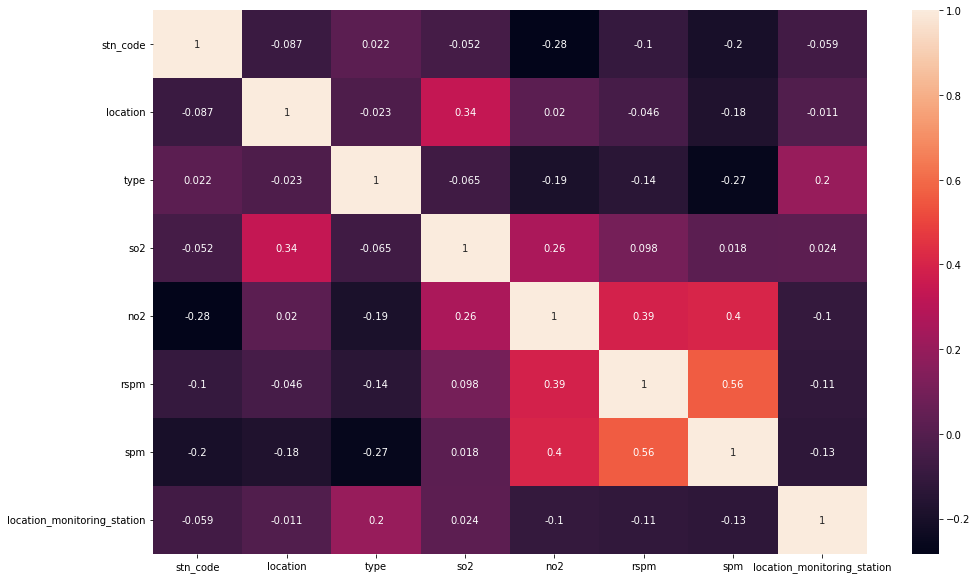

In [31]:
df2 = df.copy()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for x in df.columns:
    if df2[x].dtypes=='object':
       df2[x]=le.fit_transform(df2[x].astype(str))
corr = df2.drop("state", axis="columns").corr()

plt.figure(figsize = (16,10))
sns.heatmap(corr, annot =True)

In [32]:
df.head(10)

,stn_code,state,location,type,so2,no2,rspm,spm,location_monitoring_station,date
1036,95.0,Andhra Pradesh,Hyderabad,Industrial Area,12.9,55.8,143.7,370.7,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",2004-02-01
1037,95.0,Andhra Pradesh,Hyderabad,Industrial Area,10.4,48.9,124.7,285.7,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",2004-05-01
1038,95.0,Andhra Pradesh,Hyderabad,Industrial Area,7.6,50.1,88.0,221.3,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",2004-09-01
1039,95.0,Andhra Pradesh,Hyderabad,Industrial Area,7.3,48.5,82.7,186.7,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",2004-12-01
1040,95.0,Andhra Pradesh,Hyderabad,Industrial Area,6.8,110.3,122.3,270.7,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",2004-01-16
1041,95.0,Andhra Pradesh,Hyderabad,Industrial Area,6.9,134.1,101.7,235.0,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",2004-01-19
1042,95.0,Andhra Pradesh,Hyderabad,Industrial Area,6.2,41.6,84.7,219.3,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",2004-01-23
1043,95.0,Andhra Pradesh,Hyderabad,Industrial Area,6.3,45.7,93.7,222.3,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",2004-01-27
1044,95.0,Andhra Pradesh,Hyderabad,Industrial Area,6.1,79.5,55.7,182.3,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",2004-01-30
1045,95.0,Andhra Pradesh,Hyderabad,Industrial Area,5.2,41.6,60.3,157.7,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",2004-03-02


In [33]:
df.dtypes

stn_code                              float64
state                                  object
location                               object
type                                   object
so2                                   float64
no2                                   float64
rspm                                  float64
spm                                   float64
location_monitoring_station            object
date                           datetime64[ns]
dtype: object

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

stn_code_encoder = preprocessing.LabelEncoder()
state_encoder = preprocessing.LabelEncoder()
location_encoder = preprocessing.LabelEncoder()
type_encoder = preprocessing.LabelEncoder()
so2_encoder = preprocessing.LabelEncoder()
no2_encoder = preprocessing.LabelEncoder()
rspm_encoder = preprocessing.LabelEncoder()
spm_encoder = preprocessing.LabelEncoder()
location_monitoring_station_encoder = preprocessing.LabelEncoder()
#date_encoder = preprocessing.LabelEncoder()

df["stn_code"] = stn_code_encoder.fit_transform(df["stn_code"])
df["state"] = state_encoder.fit_transform(df["state"])
df["location"] = location_encoder.fit_transform(df["location"])
df["type"] = type_encoder.fit_transform(df["type"])
df["so2"] = so2_encoder.fit_transform(df["so2"])
df["no2"] = no2_encoder.fit_transform(df["no2"])
df["rspm"]= rspm_encoder.fit_transform(df["rspm"])
df["spm"] = spm_encoder.fit_transform(df["spm"])
df["location_monitoring_station"] = location_monitoring_station_encoder.fit_transform(df["location_monitoring_station"])
#df["date"] = date_encoder.fit_transform(df["date"])

df["date"] = df["date"].apply(lambda x: x.timestamp())


In [35]:
from sklearn.model_selection import train_test_split

y = df["so2"]
x = df[["state","type", "date"]]
# x = df[["stn_code","state","location","type","location_monitoring_station","date"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_X = scaler.fit_transform(x_train)
scaled_train_X = pd.DataFrame(scaled_train_X, columns=x_train.columns)
scaled_test_X = scaler.transform(x_test)
scaled_test_X = pd.DataFrame(scaled_test_X, columns=x_test.columns)

In [37]:
all_params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

In [38]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor()

xgb_regressor.fit(x_train,y_train)

xgb_predictions = xgb_regressor.predict(x_test)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

xgb_error = mean_squared_error(y_test, xgb_predictions, squared=False)
xgb_r2score= r2_score(y_test, xgb_predictions)
xgb_mean_absolute_error = mean_absolute_error(y_test, xgb_predictions)

print(xgb_error)
print(xgb_r2score)
print(xgb_mean_absolute_error)

39.862082163890946
0.1964817489629268
24.905883117816614


In [40]:
from datetime import datetime

def predict_so2(state, type, year):
    new_df = pd.DataFrame()
    new_df["state"] = [state]
    new_df["type"] = [type]
    new_df["date"] = [datetime(year, 1, 1).timestamp()]

    new_df["state"] = state_encoder.transform(new_df["state"])
    new_df["type"] = type_encoder.transform(new_df["type"])

    so2_prediction = xgb_regressor.predict(new_df)

    return so2_prediction

predict_so2("Andhra Pradesh", "Industrial Area", 2050)

array([43.308434], dtype=float32)

In [41]:
for number in range(2014, 2026):
    so2_pred = predict_so2("Andhra Pradesh", "Industrial Area", number)
    print(number, so2_pred)

2014 [103.42783]
2015 [65.19109]
2016 [43.308434]
2017 [43.308434]
2018 [43.308434]
2019 [43.308434]
2020 [43.308434]
2021 [43.308434]
2022 [43.308434]
2023 [43.308434]
2024 [43.308434]
2025 [43.308434]


In [43]:
#Residential and others
for number in range(2014, 2026):
    so2_pred = predict_so2("Andhra Pradesh", "Residential and others", number)
    print(number, so2_pred)

2014 [117.7093]
2015 [49.451138]
2016 [32.778053]
2017 [32.778053]
2018 [32.778053]
2019 [32.778053]
2020 [32.778053]
2021 [32.778053]
2022 [32.778053]
2023 [32.778053]
2024 [32.778053]
2025 [32.778053]


In [44]:
from sklearn.ensemble import RandomForestRegressor

RF_regressor = RandomForestRegressor()
RF_regressor.fit(x_train, y_train)
RF_predictions = RF_regressor.predict(x_test)

RF_error = mean_squared_error(y_test, RF_predictions, squared=False)
RF_r2score = r2_score(y_test, RF_predictions)
RF_mean_absolute_error = mean_absolute_error(y_test, xgb_predictions)

print(RF_error)
print(RF_r2score)
print(RF_mean_absolute_error)

43.010224808666315
0.06455294753742014
24.905883117816614


In [45]:
# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)
# for later versions:
# session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
# tf.compat.v1.keras.backend.set_session(sess)

In [46]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, BatchNormalization, ReLU, GlobalAveragePooling1D

In [47]:
# Initialising the ANN
ann_classifier = Sequential()

ann_classifier.add(Conv1D(filters=32, kernel_size=3,padding="same", input_shape = (3,1)))
ann_classifier.add(BatchNormalization())
ann_classifier.add(ReLU())

ann_classifier.add(Conv1D(filters=32, kernel_size=3,padding="same"))
ann_classifier.add(BatchNormalization())
ann_classifier.add(ReLU())

ann_classifier.add(Conv1D(filters=32, kernel_size=3,padding="same"))
ann_classifier.add(BatchNormalization())
ann_classifier.add(ReLU())

ann_classifier.add(GlobalAveragePooling1D())

ann_classifier.add(Dense(1, activation="softmax"))
# # Adding the input layer and the first hidden layer
# ann_classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# # Adding the second hidden layer
# ann_classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))

# # Adding the output layer
# ann_classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
ann_classifier.compile(optimizer = 'adam', loss = 'mse')

# Fitting the ANN to the Training set
ann_classifier.fit(x_train,y_train,batch_size = 10,
    # change to 1000 for final run (300 was better)
    epochs=2,
)

Epoch 1/2
1994/1994 [==============================] - 9s 3ms/step - loss: 4105.1504
Epoch 2/2
1994/1994 [==============================] - 9s 4ms/step - loss: 4105.1445


In [48]:
ann_predictions = ann_classifier.predict(x_test)
ann_predictions 

156/156 [==============================] - 1s 4ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [49]:
ann_error = mean_squared_error(y_test, ann_predictions, squared=False)
ann_r2score = r2_score(y_test, ann_predictions)
ann_mean_absolute_error = mean_absolute_error(y_test, ann_predictions)

print(ann_error)
print(ann_r2score)
print(ann_mean_absolute_error)

63.45882817381851
-1.0363849661545053
45.31581059390048


In [50]:
y_test

15121    18
1788     98
10290    21
15672    18
22670    28
         ..
4507     92
14985    28
24041    58
12806    18
6271     68
Name: so2, Length: 4984, dtype: int64

In [51]:
x_train

,state,type,date
16430,0,3,1.347840e+09
25354,0,0,1.428365e+09
18404,0,0,1.362701e+09
25250,0,0,1.429402e+09
17848,0,3,1.370304e+09
...,...,...,...
23509,0,0,1.405987e+09
17645,0,3,1.368403e+09
10659,0,2,1.230941e+09
13064,0,3,1.284595e+09


In [52]:
from datetime import datetime

def predict_so2(state, type, year):
    new_df = pd.DataFrame()
    new_df["state"] = [state]
    new_df["type"] = [type]
    new_df["date"] = [datetime(year, 1, 1).timestamp()]

    new_df["state"] = state_encoder.transform(new_df["state"])
    new_df["type"] = type_encoder.transform(new_df["type"])

    so2_prediction = ann_classifier.predict(new_df, verbose=0)[0][0]

    return so2_prediction

predict_so2("Andhra Pradesh", "Industrial Area", 2050)

1.0

In [53]:
for number in range(2014, 2026):
    so2_pred = predict_so2("Andhra Pradesh", "Industrial Area", number)
    print(number, so2_pred)

2014 1.0
2015 1.0
2016 1.0
2017 1.0
2018 1.0
2019 1.0
2020 1.0
2021 1.0
2022 1.0
2023 1.0
2024 1.0
2025 1.0


In [54]:
y1 = df["no2"]
x1 = df[["state","type", "date"]]
# x = df[["stn_code","state","location","type","location_monitoring_station","date"]]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

In [63]:
from xgboost import XGBRegressor
xgb_regressor1 = XGBRegressor()

xgb_regressor1.fit(x1_train,y1_train)

xgb_predictions1 = xgb_regressor1.predict(x1_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

xgb_error1 = mean_squared_error(y1_test, xgb_predictions1, squared=False)
xgb_r2score1 = r2_score(y1_test, xgb_predictions1)
xgb_mean_absolute_error1 = mean_absolute_error(y1_test, xgb_predictions1)

print(xgb_error1)
print(xgb_r2score1)
print(xgb_mean_absolute_error1)

88.66406013022124
0.3123953142135444
66.6042675587377


In [64]:
from datetime import datetime

def predict_no2(state, type, year):
    new_df1 = pd.DataFrame()
    new_df1["state"] = [state]
    new_df1["type"] = [type]
    new_df1["date"] = [datetime(year, 1, 1).timestamp()]

    new_df1["state"] = state_encoder.transform(new_df1["state"])
    new_df1["type"] = type_encoder.transform(new_df1["type"])

    no2_prediction = xgb_regressor1.predict(new_df1)

    return no2_prediction

predict_no2("Andhra Pradesh", "Industrial Area", 2050)

array([236.49365], dtype=float32)

In [65]:
for number in range(2014, 2026):
    no2_pred = predict_no2("Andhra Pradesh", "Industrial Area", number)
    print(number, no2_pred)

2014 [126.203926]
2015 [128.8642]
2016 [236.49365]
2017 [236.49365]
2018 [236.49365]
2019 [236.49365]
2020 [236.49365]
2021 [236.49365]
2022 [236.49365]
2023 [236.49365]
2024 [236.49365]
2025 [236.49365]


In [58]:
for number in range(2014, 2026):
    no2_pred = predict_no2("Andhra Pradesh", "Residential and others", number)
    print(number, no2_pred)

2014 [127.96514]
2015 [137.2465]
2016 [221.12314]
2017 [221.12314]
2018 [221.12314]
2019 [221.12314]
2020 [221.12314]
2021 [221.12314]
2022 [221.12314]
2023 [221.12314]
2024 [221.12314]
2025 [221.12314]


In [59]:
y2 = df["spm"]
x2 = df[["state","type", "date"]]
# x = df[["stn_code","state","location","type","location_monitoring_station","date"]]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=0)

In [60]:
from xgboost import XGBRegressor
xgb_regressor2 = XGBRegressor()

xgb_regressor2.fit(x2_train,y2_train)

xgb_predictions2 = xgb_regressor2.predict(x2_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

xgb_error2 = mean_squared_error(y2_test, xgb_predictions2, squared=False)
xgb_r2score2 = r2_score(y2_test, xgb_predictions2)
xgb_mean_absolute_error2 = mean_absolute_error(y2_test, xgb_predictions2)

print(xgb_error2)
print(xgb_r2score2)
print(xgb_mean_absolute_error2)

90.92765900467684
0.26353065394353237
63.094601513390366


In [61]:
from datetime import datetime

def predict_spm(state, type, year):
    new_df2 = pd.DataFrame()
    new_df2["state"] = [state]
    new_df2["type"] = [type]
    new_df2["date"] = [datetime(year, 1, 1).timestamp()]

    new_df2["state"] = state_encoder.transform(new_df2["state"])
    new_df2["type"] = type_encoder.transform(new_df2["type"])

    spm_prediction = xgb_regressor2.predict(new_df2)

    return spm_prediction

predict_spm("Andhra Pradesh", "Industrial Area", 2050)

array([229.82849], dtype=float32)

In [62]:
for number in range(2014, 2026):
    spm_pred = predict_spm("Andhra Pradesh", "Industrial Area", number)
    print(number, spm_pred)

2014 [226.03606]
2015 [228.57814]
2016 [229.82849]
2017 [229.82849]
2018 [229.82849]
2019 [229.82849]
2020 [229.82849]
2021 [229.82849]
2022 [229.82849]
2023 [229.82849]
2024 [229.82849]
2025 [229.82849]


In [66]:
for number in range(2014, 2026):
    spm_pred = predict_spm("Andhra Pradesh", "Residential and others", number)
    print(number, spm_pred)

2014 [248.66635]
2015 [251.20844]
2016 [253.93285]
2017 [253.93285]
2018 [253.93285]
2019 [253.93285]
2020 [253.93285]
2021 [253.93285]
2022 [253.93285]
2023 [253.93285]
2024 [253.93285]
2025 [253.93285]


In [67]:
y3 = df["rspm"]
x3 = df[["state","type", "date"]]
# x = df[["stn_code","state","location","type","location_monitoring_station","date"]]

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=0)

In [68]:
from xgboost import XGBRegressor
xgb_regressor3 = XGBRegressor()

xgb_regressor3.fit(x3_train,y3_train)

xgb_predictions3 = xgb_regressor3.predict(x3_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

xgb_error3 = mean_squared_error(y3_test, xgb_predictions3, squared=False)
xgb_r2score3 = r2_score(y3_test, xgb_predictions3)
xgb_mean_absolute_error3 = mean_absolute_error(y3_test, xgb_predictions3)

print(xgb_error3)
print(xgb_r2score3)
print(xgb_mean_absolute_error3)

77.13641395009007
0.2222262269761648
61.12032978033369


In [69]:
from datetime import datetime

def predict_rspm(state, type, year):
    new_df3 = pd.DataFrame()
    new_df3["state"] = [state]
    new_df3["type"] = [type]
    new_df3["date"] = [datetime(year, 1, 1).timestamp()]

    new_df3["state"] = state_encoder.transform(new_df3["state"])
    new_df3["type"] = type_encoder.transform(new_df3["type"])

    rspm_prediction = xgb_regressor3.predict(new_df3)

    return rspm_prediction

predict_rspm("Andhra Pradesh", "Industrial Area", 2050)

array([173.9401], dtype=float32)

In [70]:
for number in range(2014, 2026):
    rspm_pred = predict_rspm("Andhra Pradesh", "Industrial Area", number)
    print(number, rspm_pred)

2014 [135.09995]
2015 [106.29168]
2016 [173.9401]
2017 [173.9401]
2018 [173.9401]
2019 [173.9401]
2020 [173.9401]
2021 [173.9401]
2022 [173.9401]
2023 [173.9401]
2024 [173.9401]
2025 [173.9401]


In [71]:
for number in range(2014, 2026):
    rspm_pred = predict_rspm("Andhra Pradesh", "Residential and others", number)
    print(number, rspm_pred)

2014 [185.22449]
2015 [136.66829]
2016 [178.78937]
2017 [178.78937]
2018 [178.78937]
2019 [178.78937]
2020 [178.78937]
2021 [178.78937]
2022 [178.78937]
2023 [178.78937]
2024 [178.78937]
2025 [178.78937]
